<a href="https://colab.research.google.com/github/c-c-c-c/sdance/blob/master/sdance_autorun_hado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sdance notebook完結版
 
とりあえず動かしてみたい人向けです。
事前準備は動画だけ用意しておいてください(複数可)。松下先生の提供されているコードは不要です。
動画の拡張子はmovもしくはmp4でお願いします。

 ## 注意事項

最初に ランタイム>ランタイムタイプの変更から**GPU**に変更してください。

## import(pip install前に必要なもの)

In [0]:
from pathlib import Path
from google.colab import drive
import datetime as dt

## 定数という名の変数設定

In [0]:
JST = dt.timezone(dt.timedelta(hours=+9), 'JST')
now = dt.datetime.now(JST)
now_str = "{0:%m%d_%H%M}".format(now)

INSTALL_DIR=Path('/content')
DRIVE_DIR=INSTALL_DIR / 'drive'
TF_DIR= INSTALL_DIR / 'tf-pose-estimation'

SDANCE_DRIVE_DIR=DRIVE_DIR / 'My Drive' / 'sdance_hado' # 既存の環境とかぶってる場合はsdanceのところを別の名前に変えても動くはず
SDANCE_INPUT_DIR=SDANCE_DRIVE_DIR / 'input'
SDANCE_CACHE_DIR=TF_DIR / 'sdance'
SDANCE_CACHE_DATA_DIR=SDANCE_CACHE_DIR / 'data'
SDANCE_CACHE_INPUT_DIR=SDANCE_CACHE_DATA_DIR / 'input'
SDANCE_CACHE_INPUT_IMAGE_DIR=SDANCE_CACHE_INPUT_DIR / 'image'
SDANCE_CACHE_INPUT_VIDEO_DIR=SDANCE_CACHE_INPUT_DIR / 'video'

SDANCE_CACHE_OUTPUT_DIR=SDANCE_CACHE_DATA_DIR / ("output")

SDANCE_1_IMAGE_DIR = SDANCE_CACHE_OUTPUT_DIR / '1image'
SDANCE_2_CSV_DIR = SDANCE_CACHE_OUTPUT_DIR / '2csv'
SDANCE_2_POSE_DIR = SDANCE_CACHE_OUTPUT_DIR / '2pose'
SDANCE_3_CHOREO_DIR = SDANCE_CACHE_OUTPUT_DIR / '3choreo'
SDANCE_3_5_HADO_DIR = SDANCE_CACHE_OUTPUT_DIR / '3_5hado'
SDANCE_4_GRAPH_DIR = SDANCE_CACHE_OUTPUT_DIR / '4graph'
SDANCE_5_CONCAT_DIR = SDANCE_CACHE_OUTPUT_DIR / '5concat'
SDANCE_6_BEAT_DIR = SDANCE_CACHE_OUTPUT_DIR / '6beat'

POINT_SIZE = 18

## mount

リンクにをクリックして、認証の手順を踏んで、
Enter your authorization code:に指定されたコードをコピーして
Enterを押してください。

In [4]:
drive.mount(str(DRIVE_DIR))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 存在しない場合sdance用のディレクトリをGoogle Driveに作成する

このコードを実行すると、sdance用のディレクトリをGoogle Driveに作成されます。

実行後は作成された`My Drive/sdance/input`の中に、動画を入れてください。*複数可*

`My Drive/sdance/input`が元から存在する場合は、事前に動画を入れておいてもよいです。

In [0]:
# if not SDANCE_INPUT_DIR.is_dir():
#     SDANCE_INPUT_DIR.mkdir(parents=True)


## 事前環境インストール

基本的には https://github.com/ildoonet/tf-pose-estimation に書いてあることをしているだけです。
加えて、ffmpeg-pythonのインストールとtensorflowのダウングレードをしています。

In [6]:
!git clone https://github.com/okojoalg/tf-pose-estimation
%cd "$TF_DIR"
!pip install -r requirements.txt
!apt -q -y install swig
%cd "$TF_DIR"/models/graph/cmu
!bash download.sh
%cd "$TF_DIR"/tf_pose/pafprocess
!swig -python -c++ pafprocess.i && python3 setup.py build_ext --inplace
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.15 ffmpeg-python
%cd "$TF_DIR"

Cloning into 'tf-pose-estimation'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1368 (delta 0), reused 3 (delta 0), pack-reused 1362
Receiving objects: 100% (1368/1368), 94.14 MiB | 10.39 MiB/s, done.
Resolving deltas: 100% (729/729), done.
/content/tf-pose-estimation
  Cloning https://github.com/ppwwyyxx/tensorpack.git to /tmp/pip-req-build-zfqj8tni
  Running command git clone -q https://github.com/ppwwyyxx/tensorpack.git /tmp/pip-req-build-zfqj8tni
     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=1b616c61380d5fe6558cb317cdc2ef44c0e91afaa5b8482a39908d4d73f3020a
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
  Created wheel for tensorpack: filename=tensorpack-0.10.1-py2.py3-none-any.whl size=291617 sha256=e77dd3c55f3bae508db6bb7d16473c7af3

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 3s (408 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking swig (3.0.12-1

## import

ここから下はすべて実行して放置でよいです。（ランタイム＞以降のセルを実行 Macの場合 cmd ）

googleドライブの`My Drive/sdance`以下に動画ごとにoutput_xxxディレクトリが作成されて、結果が出力されます。

In [7]:
import logging
import ffmpeg
import re
import shutil
import sys
import time
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

# matplotlib inlineにした場合、メモリリークのバグがあり、グラフ出力処理で強制的に落ちるため、インライン表示をやめるようにしました。
%matplotlib

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Using matplotlib backend: agg


## loggingの設定

In [0]:
logger = logging.getLogger('TfPoseEstimatorRun')
logger.handlers.clear()
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s: %(levelname)-8s: %(message)s [%(filename)s:%(lineno)s - %(funcName)s()]')
ch.setFormatter(formatter)
logger.addHandler(ch)

## 関数定義

### コンテナ上のデータを消してGoogleDriveのデータをコピー

In [0]:
def copy_data(src):
    dist = SDANCE_CACHE_INPUT_VIDEO_DIR / src.name
    if SDANCE_CACHE_DATA_DIR.is_dir():
        shutil.rmtree(SDANCE_CACHE_DATA_DIR)
    SDANCE_CACHE_INPUT_VIDEO_DIR.mkdir(parents=True)
    SDANCE_CACHE_INPUT_IMAGE_DIR.mkdir(parents=True)
    SDANCE_1_IMAGE_DIR.mkdir(parents=True)
    SDANCE_2_CSV_DIR.mkdir(parents=True)
    SDANCE_2_POSE_DIR.mkdir(parents=True)
    SDANCE_3_CHOREO_DIR.mkdir(parents=True)
    SDANCE_3_5_HADO_DIR.mkdir(parents=True)
    SDANCE_4_GRAPH_DIR.mkdir(parents=True)
    SDANCE_5_CONCAT_DIR.mkdir(parents=True)
    SDANCE_6_BEAT_DIR.mkdir(parents=True)
    shutil.copyfile(src, dist)
    return dist


### 前処理

In [0]:
def prior_convert(file):
    '''mov, mp4 を jpg, mp3に分離する'''
    mp4_output_path = file.parent / "{}.mp4".format(file.stem)
    mp3_output_path = file.parent / "{}.mp3".format(file.stem)
    jpg_output_path = SDANCE_CACHE_INPUT_IMAGE_DIR / "%06d.jpg"
    SDANCE_CACHE_INPUT_IMAGE_DIR
    # mp4が存在しなければmovをmp4に変換する
    if not mp4_output_path.is_file():
        ffmpeg.input(str(file)) \
        .output(filename=str(mp4_output_path), pix_fmt='yuv420p') \
        .run()
    # mp4から音声mp3を抽出する
    if mp3_output_path.is_file():
        mp3_output_path.unlink()
    ffmpeg.input(str(mp4_output_path)) \
    .output(filename=str(mp3_output_path), map='0:1') \
    .run()
    # mp4から画像jpgを抽出する
    for f in SDANCE_CACHE_INPUT_IMAGE_DIR.glob("*.jpg"):
        f.unlink()
    ffmpeg.input(str(mp4_output_path)) \
    .output(filename=str(jpg_output_path), ss=0, r=30000/1001, start_number=000000) \
    .run()

### 2pose

In [0]:
# human_center_dic = { 1: 0.2,  2:0.1, 3:0.8  }

# sorted(human_center_dic , key = lambda x: human_center_dic[x])
# # human_center_dic.items()
# # sorted( human_center_dic.items(), key=lambda x:x[1] ).keys()

In [0]:

# 左側の人をhumansのidx0に並び替える

def sort_humans (humans) :
    human_center_dic = {}
    for idx, tmp_human in enumerate(humans):
        body_parts = []
        for tmp_key in range(common.CocoPart.Background.value):
            if tmp_key not in tmp_human.body_parts.keys():
                 continue
            body_part = tmp_human.body_parts[tmp_key]
            body_parts.append(body_part.x)
        center_average = sum(body_parts) / len(body_parts)
        # humanの現状のidxとその重心の辞書
        human_center_dic[idx] = center_average
         
    #３人以上にも対応
    result_humans = []
    for key in sorted( human_center_dic , key = lambda x: human_center_dic[x] ):
        result_humans.append(humans[key])

    return result_humans



def run_pose(resize='0x0', resize_out_ratio=4.0, model="cmu"):
    """
        resize: str
            Recommends : 432x368 or 656x368 or 1312x736, default=0x0
        model: string
            cmu(default), mobilenet_thin, mobilenet_v2_large, mobilenet_v2_small
            
    """
    logger.debug('##########################')

    w, h = model_wh(resize)
    if w == 0 or h == 0:
        e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
    else:
        e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

    logger.debug(" init done.")

    folder = SDANCE_CACHE_INPUT_IMAGE_DIR
    files = sorted(folder.glob('*.jpg'))

    skip = 0
    file_idx = 0 
    skip_frame = 0 # 0 is 30fps, 1 is 15fps, 3 is 5fps 


    for file in files:
        if skip != skip_frame:
            # do nothing
            skip = skip + 1
            continue
        skip = 0

        file_in_image  = str(file)
        file_out_image = str(SDANCE_1_IMAGE_DIR / "{:06d}.jpg".format(file_idx))
        file_out_pose  = str(SDANCE_2_POSE_DIR / "{:06d}.jpg".format(file_idx))
        file_out_csv   = str(SDANCE_2_CSV_DIR / "{:06d}.csv".format(file_idx))
        file_idx = file_idx + 1

        ########
        ###  Debug  とりあえず10枚
        ########
        
        if file_idx > 100 :
            # break
            pass

    	# get 2d estimation result
        dfs = pd.DataFrame(index=[])
        columns = ['frame', 'human', 'point', 'x', 'y']

        # estimate human poses from a single image !
        image = common.read_imgfile(file_in_image, None, None)
        cv2.imwrite(file_out_image, image)

        if image is None:
            logger.error('Image can not be read, path=%s' % image)
            sys.exit(-1)

        t = time.time()
        humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=resize_out_ratio)
        elapsed = time.time() - t

        image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
        image_h, image_w = image.shape[:2]

	    # per human
        hid = 0
        fid = 0
        print("=====")
        # print(humans[0])
        print("=====")

        # if len(humans)>0:
        
        

        humans = sort_humans(humans)
        for human in humans:

            # import pdb; pdb.set_trace()
            hid = hid + 1

            # 左の人のみの処理に
            if hid > 1:
                break 
            # per body_part
            centers = {}
            for i in range(common.CocoPart.Background.value):
                if i not in human.body_parts.keys():
                    continue
                body_part = human.body_parts[i]
                center = (int(body_part.x * image_w + 0.5), int(body_part.y * image_h + 0.5))
                centers[i] = center
                list = [[fid, hid, i, center[0], center[1]]]
                df = pd.DataFrame(data=list, columns=columns)
                # add list to dfs
                dfs = pd.concat([dfs, df])

                ## 吉村追記
                if (i == 4 or i == 7) and hid == 1:
                    cv2.circle(image, center, 100, common.CocoColors[i], thickness=50, lineType=8, shift=0)
                
                # 右手と左手の位置だけ
                # print(str(human.body_parts[i].x)+"x_y"+str(human.body_parts[i].y)  )

                

        dfs.to_csv(file_out_csv, encoding="utf-8")
        cv2.imwrite(file_out_pose, image)

### 3choreo

In [0]:
def is_valid(loc_x, i):
    if ((loc_x[i] != -1)) :
        return True
    else:
        return False

def is_valid2(loc_x, i, j):
    if (is_valid(loc_x, i) & is_valid(loc_x, j)):
        return True
    else:
        return False

def is_valid3(loc_x, i, j, k):
    if (is_valid2(loc_x, i, j) & is_valid(loc_x, k)):
        return True
    else:
        return False

def is_valid4(loc_x, i, j, k, l):
    if (is_valid3(loc_x, i, j, k) & is_valid(loc_x, l)):
        return True
    else:
        return False

def is_valid5(loc_x, i, j, k, l, m):
    if (is_valid4(loc_x, i, j, k, l) & is_valid(loc_x, m)):
        return True
    else:
        return False


def line_joint(im, loc_x, loc_y, i, j, k, l, col):
    # color is (b, g, r)
    b, g, r = col[0], col[1], col[2]
    b0, g0, r0 = b, g, r
    b1, g1, r1 = int(b*0.3), int(g*0.3), int(r*0.3)
    
    color0 = (b0, g0, r0)
    color1 = (b1, g1, r1)

    if (is_valid4(loc_x, i, j, k, l)):
        lx1 = loc_x[i]
        ly1 = loc_y[i]
        lx2 = loc_x[j]
        ly2 = loc_y[j]
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color1, 20 )
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color0, 10 )
        im = cv2.circle(im, (lx1, ly1), 4,  color0, -1)
        im = cv2.circle(im, (lx2, ly2), 8, color0, -1)
        
        lx1 = loc_x[k]
        ly1 = loc_y[k]
        lx2 = loc_x[l]
        ly2 = loc_y[l]
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color1, 20 )
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color0, 10 )

        im = cv2.circle(im, (lx1, ly1), 4,  color0, -1)
        im = cv2.circle(im, (lx2, ly2), 8, color0, -1)


        
def line_joint2(im, loc_x, loc_y, i0, i1, j0, j1, k0, k1, l0, l1, col):
    # color is (b, g, r)   
    b, g, r = col[0], col[1], col[2]
    b0, g0, r0 = b, g, r
    b1, g1, r1 = int(b*0.3), int(g*0.3), int(r*0.3)
    
    color0 = (b0, g0, r0)
    color1 = (b1, g1, r1)
    
    if (is_valid4(loc_x, i0, j0, k0, l0) & is_valid4(loc_x, i1, j1, k1, l1)):
        lx1 = int( (loc_x[i0] + loc_x[i1])/2 )
        ly1 = int( (loc_y[i0] + loc_y[i1])/2 )
        lx2 = int( (loc_x[j0] + loc_x[j1])/2 )
        ly2 = int( (loc_y[j0] + loc_y[j1])/2 )
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color1, 5 )
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color0, 3 )
     
        lx1 = int( (loc_x[k0] + loc_x[k1])/2 )
        ly1 = int( (loc_y[k0] + loc_y[k1])/2 )
        lx2 = int( (loc_x[l0] + loc_x[l1])/2 )
        ly2 = int( (loc_y[l0] + loc_y[l1])/2 )
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color1, 5 )
        im = cv2.line(im, (lx1, ly1), (lx2, ly2), color0, 3 )


def calc_theta(loc_x, loc_y, i, j, k, l):
    if (is_valid4(loc_x, i, j, k, l)):
        lx1 = loc_x[i]
        ly1 = loc_y[i]
        lx2 = loc_x[j]
        ly2 = loc_y[j]

        lx3 = loc_x[k]
        ly3 = loc_y[k]
        lx4 = loc_x[l]
        ly4 = loc_y[l]

        diff_vx = lx2 - lx1
        diff_vy = ly2 - ly1

        diff_hx = lx4 - lx3
        diff_hy = ly4 - ly3

        vec_v = np.array([diff_vx, diff_vy])
        vec_h = np.array([diff_hx, diff_hy])

        inn_vh = np.inner(vec_v, vec_h)
        nor_v = np.linalg.norm(vec_v)
        nor_h = np.linalg.norm(vec_h)

        if ((nor_v !=0) & (nor_h !=0)):
            cos_theta = np.clip(inn_vh / nor_v / nor_h, -1.0, 1.0) 
            theta = np.arccos(cos_theta) / np.pi * 180
        else:  
            theta = 0.0

    else:
        theta = 0.0

    return( theta )


def calc_theta2(loc_x, loc_y, i0, i1, j0, j1, k0, k1, l0, l1):
    if (is_valid4(loc_x, i0, j0, k0, l0) & is_valid4(loc_x, i1, j1, k1, l1)):
        lx1 = (loc_x[i0] + loc_x[i1])/2
        ly1 = (loc_y[i0] + loc_y[i1])/2
        lx2 = (loc_x[j0] + loc_x[j1])/2
        ly2 = (loc_y[j0] + loc_y[j1])/2

        lx3 = (loc_x[k0] + loc_x[k1])/2
        ly3 = (loc_y[k0] + loc_y[k1])/2
        lx4 = (loc_x[l0] + loc_x[l1])/2
        ly4 = (loc_y[l0] + loc_y[l1])/2

        diff_vx = lx2 - lx1
        diff_vy = ly2 - ly1

        diff_hx = lx4 - lx3
        diff_hy = ly4 - ly3

        vec_v = np.array([diff_vx, diff_vy])
        vec_h = np.array([diff_hx, diff_hy])

        inn_vh = np.inner(vec_v, vec_h)
        nor_v = np.linalg.norm(vec_v)
        nor_h = np.linalg.norm(vec_h)

        if ((nor_v !=0) & (nor_h !=0)):
            cos_theta = np.clip(inn_vh / nor_v / nor_h, -1.0, 1.0) 
            theta = np.arccos(cos_theta) / np.pi * 180
        else:  
            theta = 0.0

    else:
        theta = 0.0

    return( theta )


def calc_theta_from_vertical ( loc_x, loc_y, i, j ): 

    lx1 = loc_x[i]
    ly1 = loc_y[i]
    lx2 = loc_x[j]
    ly2 = loc_y[j]

    vec_v = np.array([lx2-lx1, ly2-ly1])
    # vec_h = np.array([0, 1]) # 鉛直ベクトル
    return (np.arctan2(vec_v[1], vec_v[0] ) /np.pi * 180 )
 

def calc_distance (loc_x, loc_y, i, j)  :   
    lx1 = loc_x[i]
    ly1 = loc_y[i]
    lx2 = loc_x[j]
    ly2 = loc_y[j]

    result_vec = np.array([lx2-lx1, ly2-ly1])

    print("vec.." + str(result_vec))
    return np.linalg.norm(result_vec)


def run_choreo():

    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('start run_choreo')

    folder = SDANCE_CACHE_OUTPUT_DIR / '2pose'
    files = sorted(folder.glob('*.jpg'))

    dfs = pd.DataFrame(index=[])
    
    file_idx = 0  

    for file in files:
        # file_in_image   = str(SDANCE_CACHE_INPUT_IMAGE_DIR / "{:06d}.jpg".format(file_idx))
        file_in_image   = str(folder / "{:06d}.jpg".format(file_idx))
        file_in_csv     = str(SDANCE_2_CSV_DIR / "{:06d}.csv".format(file_idx))
        file_out_choreo = str(SDANCE_3_CHOREO_DIR / "{:06d}.jpg".format(file_idx))
        # logger.debug('##################')
        # logger.debug(file_in_image)
        # logger.debug(file_in_csv)
        # logger.debug(file_out_choreo)

        columns = ['frame', 'human', 'theta1', 'theta2', 'theta3']

        im = cv2.imread(file_in_image)
        df_c = pd.read_csv(file_in_csv, encoding="utf_8")

        print(len(df_c))
        if (len(df_c) == 0):
            ################  no person, no line
            print('len is zero of ' + str(file_idx))
            cv2.imwrite(file_out_choreo, im)
            file_idx = file_idx + 1

            continue

        for i in range(df_c.human.min(), df_c.human.max()+1):
            print('human i = ' + str(i))
            loc_x = np.full(POINT_SIZE, -1)  
            loc_y = np.full(POINT_SIZE, -1)
            #print(loc_x)
            #print(loc_y)


            for j in range(POINT_SIZE):
                #rint('joint j = ' + str(j))
                dfxy = df_c[(df_c.human == i) & (df_c.point == j)] 
                #print(dfxy)
                if dfxy.size > 0:
                    loc_x[j] = dfxy.x
                    loc_y[j] = dfxy.y
                    #print('x = ' + str(dfxy.x))
                    #print('y = ' + str(dfxy.y))
            
            print(loc_x)
            print(loc_y)

            ##### 波動拳用の変更

            line_joint(im, loc_x, loc_y, 0, 4, 0, 4,   (0, 0, 255))
            line_joint(im, loc_x, loc_y, 0, 7, 0, 7,  (0, 255, 0))
            line_joint(im, loc_x, loc_y, 0, 4, 0, 7, (255, 0, 0))
            #line_joint2(im, loc_x, loc_y, 8, 11, 10, 10, 8, 11, 13, 13, (255, 0, 0))

            ###### tehta1 x theta2
            theta1 = calc_theta_from_vertical( loc_x, loc_y, 0, 4 )
            theta2 = calc_theta_from_vertical( loc_x, loc_y, 0, 7 )
            hand_distance = calc_distance(loc_x, loc_y, 4, 7)
            #theta3 = calc_theta2(loc_x, loc_y, 8, 11, 11, 10, 8, 11, 13, 13)

            list = [[file_idx, i, theta1, theta2, hand_distance]] 
            df = pd.DataFrame(data=list, columns=columns)
            dfs = pd.concat([dfs, df])
            print(str(theta1) + ' ' + str(theta2) + ' ' + str(hand_distance))

        # end of human 

        cv2.imwrite(file_out_choreo, im)
        file_idx = file_idx + 1


    # end of file 
    logger.debug('end of file')
    #dfs.to_csv('tmp.csv') 
   
    print('#############')
    dfl = pd.DataFrame(index=[])

    size = 1 + (dfs.human.max() - dfs.human.min() + 1)*3   
    columns = np.arange(size)
    ## zantei taisaku  frame, x1, x2, x3, y1, y2, y3


    for i in range(1, dfs.frame.max()+1):

        
        theta1 = np.full(dfs.human.max(), 0)
        theta2 = np.full(dfs.human.max(), 0)
        theta3 = np.full(dfs.human.max(), 0)

        for j in range(dfs.human.max()):
            dfij = dfs[(dfs.frame == i) & (dfs.human == j+1)]
            if dfij.size > 0:
                theta1[j] = dfij.theta1
                theta2[j] = dfij.theta2
                theta3[j] = dfij.theta3
        theta1 = np.sort(theta1)[::-1]
        theta2 = np.sort(theta2)[::-1]
        theta3 = np.sort(theta3)[::-1]

        print(theta1)
        npi = np.arange(1)
        npi[0] =  i
        npi = np.r_[npi, theta1]
        npi = np.r_[npi, theta2]
        npi = np.r_[npi, theta3]
        print(npi)
        list = [npi]  
        print(list)
        print('########')
        df = pd.DataFrame(data=list, columns=columns)
        dfl = pd.concat([dfl, df])

    file_out_graph_csv = str(SDANCE_3_CHOREO_DIR / 'choreo.csv')
    dfl.to_csv(file_out_graph_csv)
    logger.debug(file_out_graph_csv)
        
        
    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('done. run_choreo')

### 3.5 波動拳判定

In [0]:

def run_hado():

    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('start run_hado')
    
    file_in_csv     = str(SDANCE_3_CHOREO_DIR / "choreo.csv")
    df_hd = pd.read_csv(file_in_csv, encoding="utf_8")
    
    # folder = SDANCE_3_5_HADO_DIR / '3pose'
    folder = SDANCE_3_CHOREO_DIR
    files = sorted(folder.glob('*.jpg'))

    # print(df_hd)

    ##波動不要な部分を取り除く##
    df_hd = df_hd.iloc[ :, 1:]
    print(df_hd)

    #df_c = run_hado()
    # df_ryu = df_c.iloc[:,2:5]

    # ローパスフィルター
    df_hd.iloc[ :, 1] = lpf( df_hd.iloc[ :, 1].tolist(), 16)
    df_hd.iloc[ :, 2] = lpf( df_hd.iloc[ :, 2].tolist(), 10)
    df_hd.iloc[ :, 3] = lpf( df_hd.iloc[ :, 3].tolist(), 5)


    # 図示。inline表示
    %matplotlib inline
    from matplotlib import pyplot as plt
    plt.figure(figsize=(20,8))
    plt.plot(
        df_hd.iloc[ :, 0].tolist(),
        df_hd.iloc[ :, 1].tolist())

    plt.plot(
        df_hd.iloc[ :, 0].tolist(),
        df_hd.iloc[ :, 2].tolist())

    plt.show()

    file_out_csv = SDANCE_3_5_HADO_DIR / "chosei.csv"
    df_hd.to_csv(file_out_csv, encoding="utf-8" )
    
    # inlineをやめる
    %matplotlib 

In [0]:
def lpf(a, w):
    v0 = np.array([1, 4, 6, 4, 1])/16.0
    y1 = np.convolve(a, v0, mode='same')

    v1 = np.ones(w)/w
    y2 = np.convolve(y1, v1, mode='same')

    return y2

2020-05-21 12:29:26,906: DEBUG   : $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ [<ipython-input-50-8c3ed8b9f21b>:4 - run_hado()]
2020-05-21 12:29:26,906 DEBUG $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
2020-05-21 12:29:26,908: DEBUG   : start run_hado [<ipython-input-50-8c3ed8b9f21b>:5 - run_hado()]
2020-05-21 12:29:26,908 DEBUG start run_hado


       0    1   2    3
0      1  105  81  191
1      2  107  81  216
2      3  105  80  219
3      4  104  81  204
4      5  105  81  187
..   ...  ...  ..  ...
506  507  117  71  184
507  508  116  70  161
508  509  117  67  157
509  510  117  67  153
510  511  113  68  142

[511 rows x 4 columns]


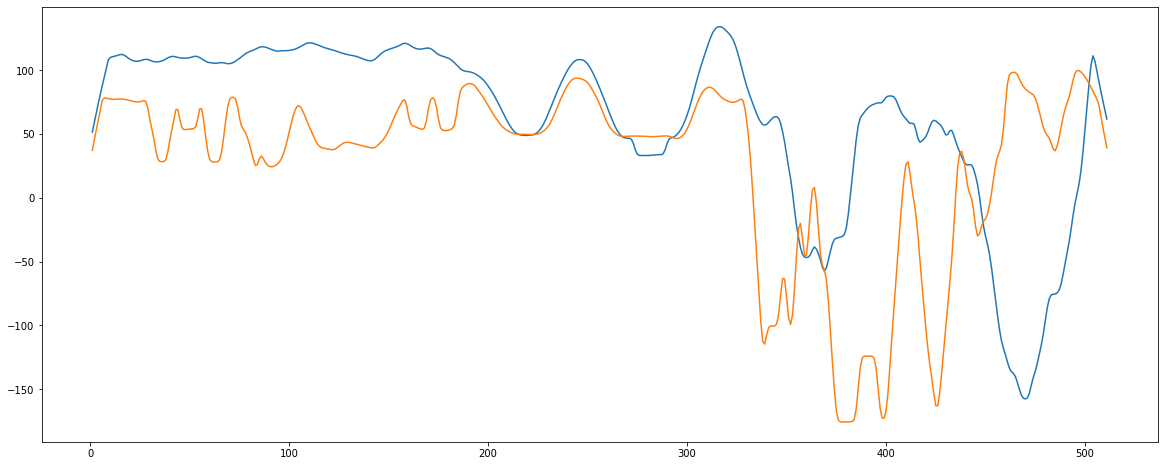

Using matplotlib backend: agg


In [52]:
run_hado()

# df_hd

In [17]:

"""
    file_idx = 0 
    for file in files:
        # file_in_image   = str(SDANCE_CACHE_INPUT_IMAGE_DIR / "{:06d}.jpg".format(file_idx))
        file_in_image   = str(folder / "{:06d}.jpg".format(file_idx))
        file_out_hado = str(SDANCE_3_5_HADO_DIR / "{:06d}.jpg".format(file_idx))

        # columns = ['frame', 'human', 'theta1', 'theta2', 'theta3']

        im = cv2.imread(file_in_image)

        ### poseで出す右手と左手の座標のcsvを使う

        print(len(df_c))
        if (len(df_c) == 0):
            ################  no person, no line
            print('len is zero of ' + str(file_idx))
            cv2.imwrite(file_out_hado, im)
            file_idx = file_idx + 1

            continue

        # for i in range(df_c.human.min(), df_c.human.max()+1):
        #     print('human i = ' + str(i))
        #     loc_x = np.full(POINT_SIZE, -1)  
        #     loc_y = np.full(POINT_SIZE, -1)

        #     for j in range(POINT_SIZE):
        #         #print('joint j = ' + str(j))
        #         dfxy = df_c[(df_c.human == i) & (df_c.point == j)] 
        #         #print(dfxy)
        #         if dfxy.size > 0:
        #             loc_x[j] = dfxy.x
        #             loc_y[j] = dfxy.y
        #             #print('x = ' + str(dfxy.x))
        #             #print('y = ' + str(dfxy.y))
            
        #     print(loc_x)
        #     print(loc_y)


            # list = [[file_idx, i, theta1, theta2, theta3]] 
            # df = pd.DataFrame(data=list, columns=columns)
            # dfs = pd.concat([dfs, df])
            # print(str(theta1) + ' ' + str(theta2) + ' ' + str(theta3))

        # end of human 

        cv2.imwrite(file_out_hado, im)
        file_idx = file_idx + 1

    # end of file 
    logger.debug('end of file')
    #dfs.to_csv('tmp.csv') 
   
    print('#############')
    # dfl = pd.DataFrame(index=[])
    # size = 1 + (dfs.human.max() - dfs.human.min() + 1)*3   
    # columns = np.arange(size)
    ## zantei taisaku  frame, x1, x2, x3, y1, y2, y3
   
        
    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('done. run_hado')
"""

'\n    file_idx = 0 \n    for file in files:\n        # file_in_image   = str(SDANCE_CACHE_INPUT_IMAGE_DIR / "{:06d}.jpg".format(file_idx))\n        file_in_image   = str(folder / "{:06d}.jpg".format(file_idx))\n        file_out_hado = str(SDANCE_3_5_HADO_DIR / "{:06d}.jpg".format(file_idx))\n\n        # columns = [\'frame\', \'human\', \'theta1\', \'theta2\', \'theta3\']\n\n        im = cv2.imread(file_in_image)\n\n        ### poseで出す右手と左手の座標のcsvを使う\n\n        print(len(df_c))\n        if (len(df_c) == 0):\n            ################  no person, no line\n            print(\'len is zero of \' + str(file_idx))\n            cv2.imwrite(file_out_hado, im)\n            file_idx = file_idx + 1\n\n            continue\n\n        # for i in range(df_c.human.min(), df_c.human.max()+1):\n        #     print(\'human i = \' + str(i))\n        #     loc_x = np.full(POINT_SIZE, -1)  \n        #     loc_y = np.full(POINT_SIZE, -1)\n\n        #     for j in range(POINT_SIZE):\n        #         #pr

In [0]:
def calc_gaussian(r, c):
    g = np.exp( - r * r / ( 2 * c * c)) / np.sqrt( 2 * np.pi ) / c
    return g

def lpf(a, w):
    v0 = np.array([1, 4, 6, 4, 1])/16.0
    y1 = np.convolve(a, v0, mode='same')

    v1 = np.ones(w)/w
    y2 = np.convolve(y1, v1, mode='same')

    return y2


### 4graph

In [0]:
def zerocross(a1, i, w):
    if ((a1[i-w] < 0) & (a1[i+w] > 0)):
        return -1
    elif ((a1[i-w] > 0) & (a1[i+w] < 0)):
        return 1
    else:
        return 0


    # if ((a1[i-1] * a1[i+1]) <= 0.0):
    #     return 1
        # if (a1[i-1] <= 0.0): #### diff up, org bottom
        #     return 1
        # else:                #### diff down, org top
        #     return 1 
    

def cntpeak(a0,  b0, b1, b2, b3, b4, b5, b6, b7, b8,  c1):
    d = np.zeros(a0.size)

    th = 5
    win = 1
    for i in range(win, a0.size-win):
        zc = zerocross(a0, i, win)

        if (abs(c1[i]) > th):
            d[i] = zc
        else:
            d[i] = 0

    return(d) 

     
def cross(a1, b1):
    c = np.zeros(a1.size)

    w1 = 1 
    w2 = 2 
    t2 = 0 
    for i in range(max(w1, w2), a1.size-max(w1, w2)):
        cnt = 0
        # zero cross
        if ((a1[i-1] == 0) & (a1[i] == 0) & (a1[i+1] == 0)):
            continue


        if ((a1[i-w1] * a1[i+w1]) <= 0.0 ):
            if (abs(a1[i-w2] - a1[i])  > t2) & (abs(a1[i] - a1[i+w2] > t2)):
                cnt = cnt + 1 


        c[i] = cnt 
        
    return c
     

def ave(a1, a2, a3, a4, a5, a6):
    b = np.zeros(a1.size)
    for i in range(0, a1.size):
        b[i] = (a1[i] + a2[i] + a3[i] + a4[i] + a5[i] + a6[i])/6.0
    
    return b

def lpf(a, w):
    v0 = np.array([1, 4, 6, 4, 1])/16.0
    y1 = np.convolve(a, v0, mode='same')

    v1 = np.ones(w)/w
    y2 = np.convolve(y1, v1, mode='same')

    return y2


def hpf(a):
    v5 = np.array([1, 4, 6, 4, 1])/16.0
    y1 = np.convolve(a, v5, mode='same')

    v05 = np.ones( 5)/5.0
    v07 = np.ones( 7)/7.0
    v11 = np.ones(11)/11.0
    v15 = np.ones(15)/15.0
    v21 = np.ones(21)/21.0
    v31 = np.ones(31)/31.0

    y2 = np.convolve(y1, v05, mode='same')
    y3 = np.convolve(y1, v15, mode='same')

    y4 = y2 - y3

    return y4


def epsilon(a, win, th):
    b = np.zeros(a.size)
    win  = int(win)
    th   = int(th)
    half = int(win/2)

    for i in range(half, a.size-1-half):
        center = a[i]

        cnt = 0
        sum = 0
        for j in range(win):
            around = a[i + j - half]
            diff = abs(around - center)
            if (diff <= th):
                sum = sum + around
                cnt = cnt + 1
                #print(str(i) + ', ' + str(j) + ' = ' + str(around))

        if (cnt != 0):
            ave = sum / cnt
        else:
            ave = center

        b[i] = ave

    return(b)


def grad(a):
    g1 = np.zeros(a.size)
    for i in range(1, a.size-1): # don't access out of array
        g1[i] = a[i+1] - a[i-1]

    return g1


def copy_choreo(i, j, cho):
    p_size = int((len(cho)-2)/3)
    tmp_zero = np.zeros(cho.shape[1])
    
    if j < p_size:
        a = cho[i*p_size + j + 2]
        print('copy [' + str(i) + '][' + str(j) + ']')
    else:
        a = tmp_zero.copy()
        print('zero [' + str(i) + '][' + str(j) + ']')
        print('zero')

    return (a)


def copy_choreo3(j, cho):
    ax = np.zeros(cho.size)
    ay = np.zeros(cho.size)
    az = np.zeros(cho.size)

    ax = copy_choreo(0, j, cho)
    ay = copy_choreo(1, j, cho)    
    az = copy_choreo(2, j, cho)    

    return(ax, ay, az)


def hpf3(ax, ay, az):
    bx = hpf(ax)
    by = hpf(ay)
    bz = hpf(az)

    return(bx, by, bz)


def grad3(ax, ay, az):
    bx = grad(ax)
    by = grad(ay)
    bz = grad(az)

    return(bx, by, bz)


def cntpeak3(   ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9,  bx0,
                ay0, ay1, ay2, ay3, ay4, ay5, ay6, ay7, ay8, ay9,  by0,
                az0, az1, az2, az3, az4, az5, az6, az7, az8, az9,  bz0):

    cx = cntpeak( ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9,  bx0)
    cy = cntpeak( ay0, ay1, ay2, ay3, ay4, ay5, ay6, ay7, ay8, ay9,  by0)
    cz = cntpeak( az0, az1, az2, az3, az4, az5, az6, az7, az8, az9,  bz0)

    return(cx, cy, cz)


def gmax(a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    mx = np.max(a0) 
    mx = max(mx, np.max(a1)) 
    mx = max(mx, np.max(a2)) 
    mx = max(mx, np.max(a3)) 
    mx = max(mx, np.max(a4)) 
    mx = max(mx, np.max(a5)) 
    mx = max(mx, np.max(a6)) 
    mx = max(mx, np.max(a7)) 
    mx = max(mx, np.max(a8)) 
    mx = max(mx, np.max(a9)) 



def gnorm3(ax, ay, az, maxx, maxy, maxz):
    bx = np.zeros(ax.size)
    by = np.zeros(ay.size)
    bz = np.zeros(az.size)


    bx = ax * 50.0 / float(maxx)
    by = ay * 50.0 / float(maxy)
    bz = az * 50.0 / float(maxz)

    return(bx, by, bz)


def normal(a0, range):
    b0 = np.zeros(a0.size)

    max0 = np.max(a0)
    min0 = np.min(a0)
    ran0 = max0 - min0

    if (ran0 != 0):
        b0 = a0 / ran0 * range
    else:
        b0 = a0

    return b0

def run_graph():
    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('run_graph.')


    file_in_csv  = SDANCE_3_CHOREO_DIR / 'choreo.csv'
    file_out_csv = SDANCE_4_GRAPH_DIR / 'graph.csv'

    cho = np.loadtxt(
                fname=file_in_csv,
                dtype='float',
                delimiter=',',
                skiprows=1 )

    cho = cho.T

    ####deb
    print("cho")
    print(cho)

    # analyze top 10 data. 
    # when less than 10, copy zeros.

    ### copy
    print('copy')
    ax0, ay0, az0 = copy_choreo3(0, cho)
    ax1, ay1, az1 = copy_choreo3(1, cho)
    ax2, ay2, az2 = copy_choreo3(2, cho)
    ax3, ay3, az3 = copy_choreo3(3, cho)
    ax4, ay4, az4 = copy_choreo3(4, cho)
    ax5, ay5, az5 = copy_choreo3(5, cho)
    ax6, ay6, az6 = copy_choreo3(6, cho)
    ax7, ay7, az7 = copy_choreo3(7, cho)
    ax8, ay8, az8 = copy_choreo3(8, cho)
    ax9, ay9, az9 = copy_choreo3(9, cho)

    # ay0 = -az0
    # ay1 = -az1
    # ay2 = -az2
    # ay3 = -az3
    # ay4 = -az4
    # ay5 = -az5
    # ay6 = -az6
    # ay7 = -az7
    # ay8 = -az8
    # ay9 = -az9



    ### hpf
    print('hpf')
    bx0, by0, bz0 = hpf3(ax0, ay0, az0)
    bx1, by1, bz1 = hpf3(ax1, ay1, az1)
    bx2, by2, bz2 = hpf3(ax2, ay2, az2)
    bx3, by3, bz3 = hpf3(ax3, ay3, az3)
    bx4, by4, bz4 = hpf3(ax4, ay4, az4)
    bx5, by5, bz5 = hpf3(ax5, ay5, az5)
    bx6, by6, bz6 = hpf3(ax6, ay6, az6)
    bx7, by7, bz7 = hpf3(ax7, ay7, az7)
    bx8, by8, bz8 = hpf3(ax8, ay8, az8)
    bx9, by9, bz9 = hpf3(ax9, ay9, az9)


    ### normalize
    print('normalize')
    maxx = gmax(bx0, bx1, bx2, bx3, bx4, bx5, bx6, bx7, bx8, bx9)
    maxy = gmax(by0, by1, by2, by3, by4, by5, by6, by7, by8, by9)
    maxz = gmax(bz0, bz1, bz2, bz3, bz4, bz5, bz6, bz7, bz8, bz9)

    cx0, cy0, cz0 = gnorm3(bx0, by0, bz0, maxx, maxy, maxz)
    cx1, cy1, cz1 = gnorm3(bx1, by1, bz1, maxx, maxy, maxz)
    cx2, cy2, cz2 = gnorm3(bx2, by2, bz2, maxx, maxy, maxz)
    cx3, cy3, cz3 = gnorm3(bx3, by3, bz3, maxx, maxy, maxz)
    cx4, cy4, cz4 = gnorm3(bx4, by4, bz4, maxx, maxy, maxz)
    cx5, cy5, cz5 = gnorm3(bx5, by5, bz5, maxx, maxy, maxz)
    cx6, cy6, cz6 = gnorm3(bx6, by6, bz6, maxx, maxy, maxz)
    cx7, cy7, cz7 = gnorm3(bx7, by7, bz7, maxx, maxy, maxz)
    cx8, cy8, cz8 = gnorm3(bx8, by8, bz8, maxx, maxy, maxz)
    cx9, cy9, cz9 = gnorm3(bx9, by9, bz9, maxx, maxy, maxz)


    ### grad
    print('gradient')
    dx0, dy0, dz0 = grad3(cx0, cy0, cz0)
    dx1, dy1, dz1 = grad3(cx1, cy1, cz1)
    dx2, dy2, dz2 = grad3(cx2, cy2, cz2)
    dx3, dy3, dz3 = grad3(cx3, cy3, cz3)
    dx4, dy4, dz4 = grad3(cx4, cy4, cz4)
    dx5, dy5, dz5 = grad3(cx5, cy5, cz5)
    dx6, dy6, dz6 = grad3(cx6, cy6, cz6)
    dx7, dy7, dz7 = grad3(cx7, cy7, cz7)
    dx8, dy8, dz8 = grad3(cx8, cy8, cz8)
    dx9, dy9, dz9 = grad3(cx9, cy9, cz9)



    #
    #v = np.zeros(ax0.size)
    #for i in range(0, ax0.size):
    #    vec = np.array([y1[i], y2[i], y3[i], y4[i], y5[i], y6[i]])
    #    var = np.var(vec)
    #    v[i] = var


    ### count peak
    print('peak')
    ex0, ey0, ez0 = cntpeak3(   dx0, dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9,  cx0,
                                dy0, dy1, dy2, dy3, dy4, dy5, dy6, dy7, dy8, dy9,  cy0,
                                dz0, dz1, dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9,  cz0)

    ex1, ey1, ez1 = cntpeak3(   dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx0,  cx1,
                                dy1, dy2, dy3, dy4, dy5, dy6, dy7, dy8, dy9, dy0,  cy1,
                                dz1, dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9, dz0,  cz1)

    ex2, ey2, ez2 = cntpeak3(   dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx0, dx1,  cx2,
                                dy2, dy3, dy4, dy5, dy6, dy7, dy8, dy9, dy0, dy1,  cy2,
                                dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9, dz0, dz1,  cz2)

    ex3, ey3, ez3 = cntpeak3(   dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx0, dx1, dx2,  cx3,
                                dy3, dy4, dy5, dy6, dy7, dy8, dy9, dy0, dy1, dy2,  cy3,
                                dz3, dz4, dz5, dz6, dz7, dz8, dz9, dz0, dz1, dz2,  cz3)

    ex4, ey4, ez4 = cntpeak3(   dx4, dx5, dx6, dx7, dx8, dx9, dx0, dx1, dx2, dx3,  cx4,
                                dy4, dy5, dy6, dy7, dy8, dy9, dy0, dy1, dy2, dy3,  cy4,
                                dz4, dz5, dz6, dz7, dz8, dz9, dz0, dz1, dz2, dz3,  cz4)

    ex5, ey5, ez5 = cntpeak3(   dx5, dx6, dx7, dx8, dx9, dx0, dx1, dx2, dx3, dx4,  cx5,
                                dy5, dy6, dy7, dy8, dy9, dy0, dy1, dy2, dy3, dy4,  cy5,
                                dz5, dz6, dz7, dz8, dz9, dz0, dz1, dz2, dz3, dz4,  cz5)

    ex6, ey6, ez6 = cntpeak3(   dx6, dx7, dx8, dx9, dx0, dx1, dx2, dx3, dx4, dx5,  cx6,
                                dy6, dy7, dy8, dy9, dy0, dy1, dy2, dy3, dy4, dy5,  cy6,
                                dz6, dz7, dz8, dz9, dz0, dz1, dz2, dz3, dz4, dz5,  cz6)

    ex7, ey7, ez7 = cntpeak3(   dx7, dx8, dx9, dx0, dx1, dx2, dx3, dx4, dx5, dx6,  cx7,
                                dy7, dy8, dy9, dy0, dy1, dy2, dy3, dy4, dy5, dy6,  cy7,
                                dz7, dz8, dz9, dz0, dz1, dz2, dz3, dz4, dz5, dz6,  cz7)

    ex8, ey8, ez8 = cntpeak3(   dx8, dx9, dx0, dx1, dx2, dx3, dx4, dx5, dx6, dx7,  cx8,
                                dy8, dy9, dy0, dy1, dy2, dy3, dy4, dy5, dy6, dy7,  cy8,
                                dz8, dz9, dz0, dz1, dz2, dz3, dz4, dz5, dz6, dz7,  cz8)

    ex9, ey9, ez9 = cntpeak3(   dx9, dx0, dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8,  cx9,
                                dy9, dy0, dy1, dy2, dy3, dy4, dy5, dy6, dy7, cy8,  cy9,
                                cy9, dz0, dz1, dz2, dz3, dz4, dz5, dz6, dz7, dz8,  cz9)


    ### sum peaks
    fx = ex0 + ex1 + ex2 + ex3 + ex4 + ex5 + ex6 + ex7 + ex8 + ex9
    fy = ey0 + ey1 + ey2 + ey3 + ey4 + ey5 + ey6 + ey7 + ey8 + ey9
    fz = ez0 + ez1 + ez2 + ez3 + ez4 + ez5 + ez6 + ez7 + ez8 + ez9 


    gx = epsilon(fx, 31, 1) 
    gy = epsilon(fy, 31, 1) 
    gz = epsilon(fz, 31, 1) 

    hx = normal(gx, 100)
    hy = normal(gy, 100)
    hz = normal(gz, 100)

    ix = abs(hx)
    iy = abs(hy)
    iz = abs(hz)


    #########################
    ### x axis
    x = np.arange(ax1.size)


    #### save to csv

    yx = hx.astype(np.int32)
    yy = hy.astype(np.int32)
    yz = hz.astype(np.int32)
    z0 = np.vstack((x, yx, yy, yz))
    z0 = z0.T

    np.savetxt(file_out_csv, z0, fmt='%d', delimiter=',') 



    #c1 = b1 + b2 + b3 + b4 + b5 + b6
    #c2 = ave(y1, y2, y3, y4, y5, y6) 
    #c3 = c1 #* c2

    #d1 = cross(z1, y1)
    #d2 = cross(z2, y2)
    #d3 = cross(z3, y3)
    #d4 = cross(z4, y4)
    #d5 = cross(z5, y5)
    #d6 = cross(z6, y6)
    #d7 = d1 + d2 + d3 + d4 + d5 + d6
    #d7[d7==1] = 0



    #max_y = np.max(y1)
    #max_y = max(max_y, np.max(y2))
    #max_y = max(max_y, np.max(y3))
    #max_y = max(max_y, np.max(y4))
    #max_y = max(max_y, np.max(y5))
    #max_y = max(max_y, np.max(y6))
    #max_c = np.max(c1)
    #c1 = c1 * max_y / max_c




    if False:

        plt.rcParams["axes.facecolor"] = (1,1,1,0) 
        #fig = plt.figure(facecolor="black", edgecolor="white", linewidth=2) 

        plt.plot(x, cx0, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx1, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx2, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx3, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx4, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx5, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx6, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx7, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx8, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx9, 'r', linewidth=0.5, marker='')
        plt.plot([0, ax0.size], [0, 0], color = 'gray', linewidth=0.2)

        plt.plot(x, cy0-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy1-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy2-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy3-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy4-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy5-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy6-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy7-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy8-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy9-50, 'g', linewidth=0.5, marker='')
        plt.plot([0, ax0.size], [-50, -50], color = 'gray', linewidth=0.2)

        plt.plot(x, cz0-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz1-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz2-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz3-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz4-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz5-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz6-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz7-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz8-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz9-100, 'b', linewidth=0.5, marker='')
        plt.plot([0, ax0.size], [-100, -100], color = 'gray', linewidth=0.2)


        plt.plot(x, ix*0.9+150, 'r', linewidth=2.0, marker='')
        plt.plot(x, iy*0.9+100, 'g', linewidth=2.0, marker='')
        plt.plot(x, iz*0.9+50,  'b', linewidth=2.0, marker='')


        plt.show()
        sys.exit()



    rcParams['figure.figsize'] = 20, 8 
    #plt.rcParams["axes.facecolor"] = (1,1,1,0) 

    len = 30 * 6 
    for i in range(0, ax0.size):
        #now = ax0.size-i-1 # backword
        now = i 

        #### bug. can't change facecolor to black. don't care.
        plt.figure(facecolor="black", edgecolor="white", linewidth=2) 


        plt.xlim(now - len/4, now + len/4*3)
        plt.plot([now, now], [200, -150], color = 'black', linewidth=1.0) 
        ####################

        plt.plot(x, cx0, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx1, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx2, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx3, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx4, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx5, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx6, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx7, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx8, 'r', linewidth=0.5, marker='')
        plt.plot(x, cx9, 'r', linewidth=0.5, marker='')
        plt.plot([0, ax0.size], [0, 0], color = 'gray', linewidth=0.2)

        plt.plot(x, cy0-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy1-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy2-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy3-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy4-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy5-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy6-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy7-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy8-50, 'g', linewidth=0.5, marker='')
        plt.plot(x, cy9-50, 'g', linewidth=0.5, marker='')
        plt.plot([0, ax0.size], [-50, -50], color = 'gray', linewidth=0.2)

        plt.plot(x, cz0-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz1-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz2-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz3-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz4-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz5-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz6-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz7-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz8-100, 'b', linewidth=0.5, marker='')
        plt.plot(x, cz9-100, 'b', linewidth=0.5, marker='')
        plt.plot([0, ax0.size], [-100, -100], color = 'gray', linewidth=0.2)


        plt.plot(x, ix*0.9+150, 'r', linewidth=2.0, marker='')
        plt.plot(x, iy*0.9+100, 'g', linewidth=2.0, marker='')
        plt.plot(x, iz*0.9+50,  'b', linewidth=2.0, marker='')


        plt.savefig(SDANCE_4_GRAPH_DIR / "{:06d}.jpg".format(now))
        plt.close()
        print('run_graph ' + str(now))
        #plt.show()

    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('done. run_graph')

### 5concat

In [0]:
def run_concat():
    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('start run_concat')

    folder = SDANCE_CACHE_OUTPUT_DIR / '4graph' #3choreoから4graphに直した。

    files = sorted(folder.glob('*.jpg'))

    file_idx = 0
    for file in files:

        im1 = cv2.imread(str(SDANCE_3_CHOREO_DIR / "{:06d}.jpg".format(file_idx)))  
        im2 = cv2.imread(str(SDANCE_4_GRAPH_DIR / "{:06d}.jpg".format(file_idx)))

        h1, w1, c = im1.shape[:3]
        h2, w2, c = im2.shape[:3]

        ww = 900 
        ratio1 = ww/w1
        ratio2 = ww/w2 

        im3 = cv2.resize(im1, dsize=None, fx=ratio1, fy=ratio1)
        im4 = cv2.resize(im2, dsize=None, fx=ratio2, fy=ratio2)

        im5 = cv2.vconcat([im3, im4])

        #### for ffmpeg, width and height must be odd.
        h5, w5, c = im5.shape[:3]

        w6 = int(w5/2)*2
        h6 = int(h5/2)*2

        ratiow6 = w6/w5
        ratioh6 = h6/h5

        im6 = cv2.resize(im5, dsize=None, fx=ratiow6, fy=ratioh6)
        file_out_con = str(SDANCE_5_CONCAT_DIR / "{:06d}.jpg".format(file_idx))
        cv2.imwrite(file_out_con, im6)
        print(file_out_con)

        file_idx = file_idx + 1


    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('done. run_concat')

### 6beat

In [0]:
def draw_beat2(bx, by, bz, idx0, idx1, im1, thick, colr, width, height):


    if (idx0 < 0):
        return
    elif (bx.size <= idx0 ):
        return
    if (idx1 < 0):
        return
    elif (bx.size <= idx1 ):
        return

    if (colr < 1.0):
        col0 = int(min(255*colr, 255))
        col1 = 0
        colorx = (col1, col1, col0)
        colory = (col1, col0, col1)
        colorz = (col0, col1, col1)
    else:
        col0 = 255
        col1 = int(min(255*(colr-1.0), 255))
        colorx = (col1, col1, col0)
        colory = (col1, col0, col1)
        colorz = (col0, col1, col1)
    

    cx0 = bx[idx0]
    cy0 = by[idx0]
    cz0 = bz[idx0]

    cx1 = bx[idx1]
    cy1 = by[idx1]
    cz1 = bz[idx1]

    cx = int((cx0 + cx1) / 2)
    cy = int((cy0 + cy1) / 2)
    cz = int((cz0 + cz1) / 2)

    dx_x0 = int(width/2) - 80
    dx_y0 = int(height/2)  - cx

    dx_x1 = int(width/2) - 80 + 40
    dx_y1 = int(height/2) - cx
    

    dy_x0 = int(width/2) + 80
    dy_y0 = int(height/2) - cy
    
    dy_x1 = int(width/2) + 80 + 40
    dy_y1 = int(height/2) - cy

    
    dz_x0 = int(width/2) 
    dz_y0 = int(height/2) - cz

    dz_x1 = int(width/2)  + 40
    dz_y1 = int(height/2) - cz
    
    cv2.rectangle(im1, (dx_x0, dx_y0), (dx_x1, dx_y1), colorx, thickness=thick)
    cv2.rectangle(im1, (dy_x0, dy_y0), (dy_x1, dy_y1), colory, thickness=thick)
    cv2.rectangle(im1, (dz_x0, dz_y0), (dz_x1, dz_y1), colorz, thickness=thick)

    return

def run_beat():
    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('start run_beat')


    file_in_csv = str(SDANCE_4_GRAPH_DIR / 'graph.csv')
    a0 = np.loadtxt( fname=file_in_csv, dtype='int', delimiter=',') 
    a0 = a0.T 

    tmp, bx, by, bz = np.split(a0, [1, 2, 3])

    bx = bx.T
    by = by.T
    bz = bz.T


    folder = SDANCE_5_CONCAT_DIR
    files = sorted(folder.glob('*.jpg'))

    file_idx = 0 

    for file in files:
        #if (file_idx > 1000): break

        print(file_idx)


        im1 = cv2.imread(str(SDANCE_5_CONCAT_DIR / "{:06d}.jpg".format(file_idx)))

        if len(im1.shape) == 3:
            height, width, channels = im1.shape[:3]
        else:
            height, width = im1.shape[:2]
            channels = 1

  

        draw_beat2(bx, by, bz, file_idx-2, file_idx-2 ,im1, 6, 0.3, width, height)
        draw_beat2(bx, by, bz, file_idx-1, file_idx-2 ,im1, 6, 0.4, width, height)
        draw_beat2(bx, by, bz, file_idx-1, file_idx-1 ,im1, 6, 0.5, width, height)
        draw_beat2(bx, by, bz, file_idx,   file_idx-1 ,im1, 6, 0.6, width, height)

        draw_beat2(bx, by, bz, file_idx,   file_idx   ,im1, 22, 1.5, width, height)
        draw_beat2(bx, by, bz, file_idx,   file_idx   ,im1, 18, 0.3, width, height)
        draw_beat2(bx, by, bz, file_idx,   file_idx   ,im1, 14, 1.5, width, height)
        draw_beat2(bx, by, bz, file_idx,   file_idx   ,im1, 10, 1.0, width, height)



        #print(str(file_idx) + ' ' + str(cx) + ' ' +str(cy) + ' ' +str(cz) + ' ' + str(width) + 'x' + str(height))



        file_out_img = str(SDANCE_6_BEAT_DIR / "{:06d}.jpg".format(file_idx))
        
        cv2.imwrite(file_out_img, im1)
        print('run_beat ' + str(file_idx))


        file_idx = file_idx + 1

    logger.debug('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    logger.debug('done. run_beat')

### 静止画と音声を結合して動画にする

In [0]:
def union(file):
    jpg_input_path = SDANCE_CACHE_OUTPUT_DIR / "3choreo" / "%06d.jpg"
    mp3_input_path = SDANCE_CACHE_INPUT_VIDEO_DIR / "{}.mp3".format(file.stem)
    mp4_output_path = file

    if mp4_output_path.is_file():
        mp4_output_path.unlink()
    jpg = ffmpeg.input(str(jpg_input_path), framerate=30000/1001)
    mp3 = ffmpeg.input(str(mp3_input_path))
    ffmpeg.output(
        jpg,
        mp3,
        filename=str(mp4_output_path),
        vcodec='libx264', 
        acodec='aac',
        strict='experimental',
        ab=192000,
        ac=2,
        ar=48000,
        pix_fmt='yuv420p'
        ) \
    .run()

In [23]:

for src in list(filter(lambda x: re.search(r'.+\.(mov|mp4)', str(x)), SDANCE_INPUT_DIR.glob('*'))):
    file = copy_data(src)
    prior_convert(file)
    run_pose(resize='512x256')
    run_choreo()
    run_hado()
    # # # run_graph()
    # # run_concat()
    # run_beat()
    union(SDANCE_CACHE_OUTPUT_DIR / file.name)

    # shutil.copytree(SDANCE_CACHE_OUTPUT_DIR, SDANCE_DRIVE_DIR / ('output_{}'.format(file.stem)+now_str) )
    shutil.copytree(SDANCE_CACHE_OUTPUT_DIR, SDANCE_DRIVE_DIR / 'output_{}'.format(file.stem) )

2020-05-21 12:10:20,293: DEBUG   : ########################## [<ipython-input-12-b2b45a813b81>:34 - run_pose()]
2020-05-21 12:10:20,293 DEBUG ##########################
[2020-05-21 12:10:20,295] [TfPoseEstimator] [INFO] loading graph from /content/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=512x256)
2020-05-21 12:10:20,295 INFO loading graph from /content/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=512x256)


2020-05-21 12:10:20,297 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:311: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.



2020-05-21 12:10:20,300 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:312: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



2020-05-21 12:10:20,670 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:330: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



2020-05-21 12:10:21,210 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:332: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

2020-05-21 12:10:22,887 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:341: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



2020-05-21 12:10:22,890 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:342: The name tf.image.resize_area is deprecated. Please use tf.compat.v1.image.resize_area instead.



2020-05-21 12:10:22,905 WARNING From /content/tf-pose-estimation/tf_pose/tensblur/smoother.py:96: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-05-21 12:10:22,925 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:354: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2020-05-21 12:10:22,928 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:359: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



2020-05-21 12:10:22,930 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:360: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



2020-05-21 12:10:22,932 WARNING From /content/tf-pose-estimation/tf_pose/estimator.py:362: The name tf.report_uninitialized_variables is deprecated. Please use tf.compat.v1.report_uninitialized_variables instead.

2020-05-21 12:10:32,392: DEBUG   :  init done. [<ipython-input-12-b2b45a813b81>:42 - run_pose()]
2020-05-21 12:10:32,392 DEBUG  init done.


=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
=====
====

2020-05-21 12:12:50,728: DEBUG   : $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ [<ipython-input-13-6b00ee8202f4>:188 - run_choreo()]
2020-05-21 12:12:50,728 DEBUG $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
2020-05-21 12:12:50,730: DEBUG   : start run_choreo [<ipython-input-13-6b00ee8202f4>:189 - run_choreo()]
2020-05-21 12:12:50,730 DEBUG start run_choreo


=====
=====
13
human i = 1
[435 345 240 215 380 440 515 490 260  -1  -1 415  -1  -1 410 440 325  -1]
[118 203 186 315 270 225 371 422 546  -1  -1 540  -1  -1  96  96 101  -1]
vec..[110 152]
109.89225705335544 79.74491823746318 187.62729012593024
13
human i = 1
[435 345 235 205 385 450 500 485 255  -1  -1 415  -1  -1 410 440 330  -1]
[135 225 203 343 315 248 399 478 585  -1  -1 574  -1  -1 113 113 118  -1]
vec..[100 163]
105.52411099675427 81.70626265353921 191.23022773609824
13
human i = 1
[435 340 225 205 370 460 495 490 260  -1  -1 420  -1  -1 410 440 330  -1]
[146 248 225 366 354 270 422 534 608  -1  -1 596  -1  -1 124 129 135  -1]
vec..[120 180]
107.35402463626133 81.9319284186272 216.33307652783935
13
human i = 1
[430 340 225 205 370 450 490 495 265  -1  -1 420  -1  -1 410 435 330  -1]
[158 253 231 377 377 276 439 557 602  -1  -1 596  -1  -1 135 135 146  -1]
vec..[125 180]
105.32151007486479 80.74738080664356 219.14607000811125
13
human i = 1
[430 335 220 200 375 450 490 490 250  

2020-05-21 12:13:17,538: DEBUG   : end of file [<ipython-input-13-6b00ee8202f4>:268 - run_choreo()]
2020-05-21 12:13:17,538 DEBUG end of file


[520 415 335 330 480 485 550 590 340 310  -1 490 590  -1 500 530 435  -1]
[ 79 124  90 180 169 146 231 259 473 686  -1 439 630  -1  51  62  39  -1]
vec..[110  90]
113.96248897457819 68.74949449286676 142.12670403551894
#############
[105]
[  1 105  81 191]
[array([  1, 105,  81, 191])]
########
[107]
[  2 107  81 216]
[array([  2, 107,  81, 216])]
########
[105]
[  3 105  80 219]
[array([  3, 105,  80, 219])]
########
[104]
[  4 104  81 204]
[array([  4, 104,  81, 204])]
########
[105]
[  5 105  81 187]
[array([  5, 105,  81, 187])]
########
[109]
[  6 109  82 198]
[array([  6, 109,  82, 198])]
########
[113]
[  7 113  79 189]
[array([  7, 113,  79, 189])]
########
[114]
[  8 114  76 195]
[array([  8, 114,  76, 195])]
########
[123]
[  9 123  77 183]
[array([  9, 123,  77, 183])]
########
[124]
[ 10 124  77 192]
[array([ 10, 124,  77, 192])]
########
[120]
[ 11 120  75 168]
[array([ 11, 120,  75, 168])]
########
[109]
[ 12 109  74 157]
[array([ 12, 109,  74, 157])]
########
[109]
[ 13 

2020-05-21 12:13:19,787: DEBUG   : /content/tf-pose-estimation/sdance/data/output/3choreo/choreo.csv [<ipython-input-13-6b00ee8202f4>:311 - run_choreo()]
2020-05-21 12:13:19,787 DEBUG /content/tf-pose-estimation/sdance/data/output/3choreo/choreo.csv
2020-05-21 12:13:19,789: DEBUG   : $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ [<ipython-input-13-6b00ee8202f4>:314 - run_choreo()]
2020-05-21 12:13:19,789 DEBUG $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
2020-05-21 12:13:19,790: DEBUG   : done. run_choreo [<ipython-input-13-6b00ee8202f4>:315 - run_choreo()]
2020-05-21 12:13:19,790 DEBUG done. run_choreo
2020-05-21 12:13:19,793: DEBUG   : $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ [<ipython-input-14-9ff13fad96bf>:4 - run_hado()]
2020-05-21 12:13:19,793 DEBUG $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
2020-05-21 12:13:19,796: DEBUG   : start run_hado [<ipython-input-14-9ff13fad96bf>:5 - run_hado()]
2020-05-21 12:13:19,796 DEBUG start run_hado


[array([ 477, -174,   79,  764])]
########
[-176]
[ 478 -176   77  754]
[array([ 478, -176,   77,  754])]
########
[-177]
[ 479 -177   76  746]
[array([ 479, -177,   76,  746])]
########
[0]
[480   0  23 732]
[array([480,   0,  23, 732])]
########
[0]
[481   0  21 721]
[array([481,   0,  21, 721])]
########
[0]
[482   0  20 708]
[array([482,   0,  20, 708])]
########
[0]
[483   0  18 701]
[array([483,   0,  18, 701])]
########
[0]
[484   0  18 695]
[array([484,   0,  18, 695])]
########
[-175]
[ 485 -175   83 1215]
[array([ 485, -175,   83, 1215])]
########
[17]
[486  17  77 146]
[array([486,  17,  77, 146])]
########
[0]
[487   0  19 681]
[array([487,   0,  19, 681])]
########
[0]
[488   0  20 680]
[array([488,   0,  20, 680])]
########
[0]
[489   0  23 682]
[array([489,   0,  23, 682])]
########
[-177]
[ 490 -177   96  689]
[array([ 490, -177,   96,  689])]
########
[-175]
[ 491 -175   98  698]
[array([ 491, -175,   98,  698])]
########
[-172]
[ 492 -172  100  706]
[array([ 492, -172

FileExistsError: ignored

In [0]:
df_c = run_hado()

# df_ryu = df_c.iloc[:,2:5]

file_out_csv = SDANCE_3_5_HADO_DIR / "chosei.csv"
df_c.to_csv(file_out_csv, encoding="utf-8")

In [0]:
df_c